In [1]:
!pip install folium

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv("accidents.csv")
print(df.head())
print(df.info())

In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601')

In [6]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

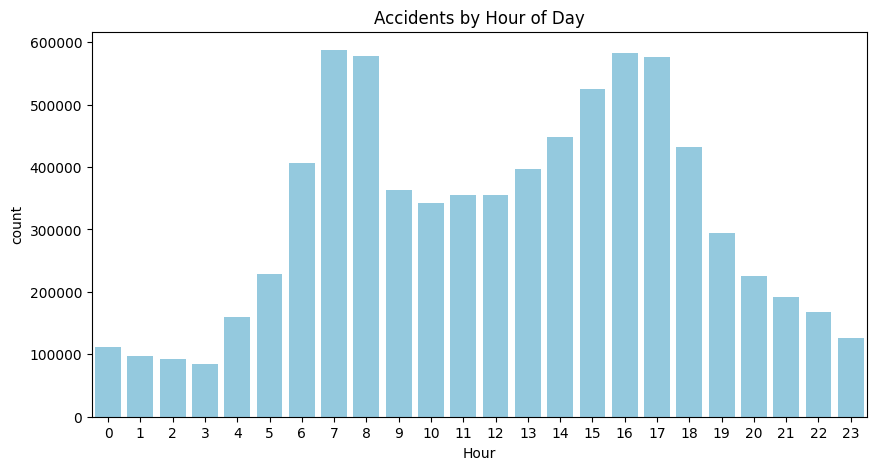

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df,color="skyblue")
plt.title("Accidents by Hour of Day")
plt.show()

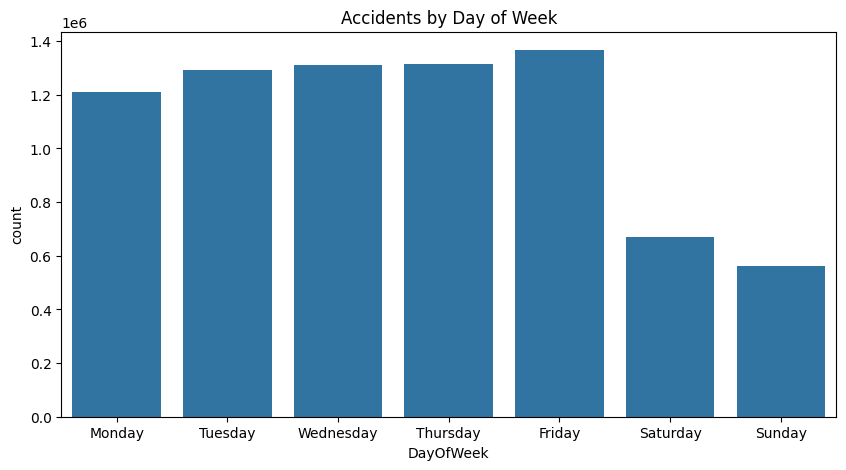

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x="DayOfWeek", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Accidents by Day of Week")
plt.show()

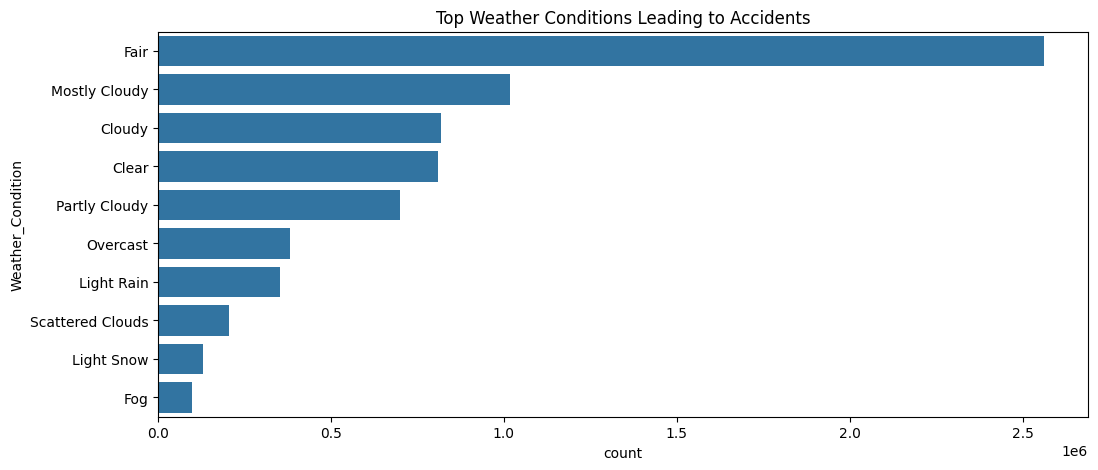

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(y="Weather_Condition", data=df, order=df["Weather_Condition"].value_counts().head(10).index)
plt.title("Top Weather Conditions Leading to Accidents")
plt.show()

In [13]:
df['Start_Lat'] = pd.to_numeric(df['Start_Lat'], errors='coerce')
df['Start_Lng'] = pd.to_numeric(df['Start_Lng'], errors='coerce')
df = df.dropna(subset=['Start_Lat','Start_Lng'])

# Create map
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=6)

# Add heatmap with adjusted radius
HeatMap(data=df[['Start_Lat', 'Start_Lng']], radius=15, blur=10).add_to(m)

# Save to file
m.save("accident_hotspots.html")
